## Segunda Entrega

Detecção de ondas alpha.

Importação das bibliotecas: **matplotlib**, **numpy** e **mne**.

In [175]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import mne
from mne.time_frequency import psd_welch as pw

Leitura dos dados:

In [176]:
arquivos = ['OpenBCI-RAW-2019-06-07_00-37-39.txt', 'OpenBCI-RAW-2019-06-07_01-09-36.txt', 'OpenBCI-RAW-2019-06-07_14-21-59.txt']
conteudo = open(arquivos[1], 'r').read().splitlines()

canais = []     #[n segundos][250][6] -> [n segundos][6][250]
horario = []    #[n segundos]
BUFFER = 3      # >3 segundos
INTERVALO = 0.5	#0.5 segundos

print("BUFFER: " + str(BUFFER) + "s")
print("INTERVALO: " + str(INTERVALO) + "s")

valores = []	#alpha (maior) - segundo maior
tempos = []		#quando isso ocorreu
#raws = []
psdss = []

cont = 0
canais_temp = []
horario_temp = []
for i in range(6, len(conteudo)):
	temp = conteudo[i].split(', ')
	if cont == int(temp[0]):
		canais_temp.append(temp[1:7])
		horario_temp.append(temp[-1])
	else:
		cont = int(temp[0])
	cont += 1
	if cont == 256:
		cont = 0
		while len(canais_temp) > 250:
			canais_temp.pop()
			horario_temp.pop()
		if len(canais_temp) == 250:

			for j in range(len(canais_temp)):
				canais.append(canais_temp[j])
				horario.append(horario_temp[j])

		canais_temp = []
		horario_temp = []

canais = np.transpose(canais)

canais = np.array(canais)
horario = np.array(horario)

BUFFER: 3s
INTERVALO: 0.5s


Processamento dos dados e detecção das ondas alpha

In [177]:
ch_names = ['PO3', 'PO4', 'P8', 'O1', 'O2', 'P7']
ch_types = ['eeg'] * 6

i = 0
while i < (len(horario) - int(BUFFER * 250)):
	info = mne.create_info(ch_names=ch_names, sfreq=256, ch_types=ch_types)
	raw = mne.io.RawArray(canais[:, i:int(BUFFER * 250) + i], info, verbose=False)
	raw.notch_filter(np.arange(60, 121, 60), fir_design='firwin', trans_bandwidth=6.7, filter_length='2925ms', verbose=False)
	raw.filter(5., 50., fir_design='firwin', l_trans_bandwidth=3.35, filter_length='2925ms', verbose=False)

	psds, freqs = pw(raw, verbose=False)

	media = []
	for valor in range(len(psds[0])):
		canal = psds[:,valor]
		media.append(canal.mean())

	delta = []
	theta = []
	alpha = []
	gamma = []
	beta = []
	for f in range(len(freqs)):
		if freqs[f] >= 1 and freqs[f] <= 4:
			delta.append(media[f])
		if freqs[f] >= 4 and freqs[f] <= 7:
			theta.append(media[f])
		if freqs[f] >= 8 and freqs[f] <= 12:
			alpha.append(media[f])
		if freqs[f] >= 25 and freqs[f] <= 50:
			gamma.append(media[f])
		if freqs[f] >= 12 and freqs[f] <= 30:
			beta.append(media[f])
	delta = np.array(delta)
	theta = np.array(theta)
	alpha = np.array(alpha)
	gamma = np.array(gamma)
	beta = np.array(beta)

	maiores = []
	maiores.append(delta.mean())
	maiores.append(theta.mean())
	maiores.append(alpha.mean())
	maiores.append(gamma.mean())
	maiores.append(beta.mean())
	maiores = np.array(maiores)

	if maiores.max() == maiores[2]:
		valor_alpha = maiores[2]
		maiores = np.delete(maiores, 2)
		segundo_maior = maiores.max()
		valores.append(valor_alpha - segundo_maior)
		tempos.append([horario[i], horario[i + int(BUFFER * 250) -1]])
		#raws.append(raw)
		psdss.append([media, freqs])
        
	i = i + int(INTERVALO * 250)

Exibicao das ocorrencias de ondas alpha

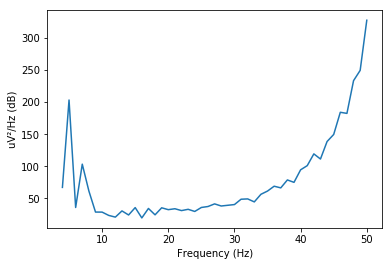

01:11:02.366	intesidade alpha: 1.7188890404358421


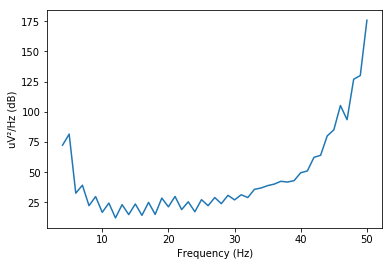

01:11:03.325	intesidade alpha: 4.8512009840587424


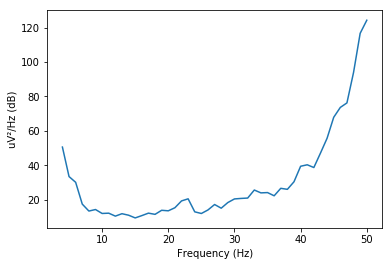

01:11:04.294	intesidade alpha: 17.473642363366526


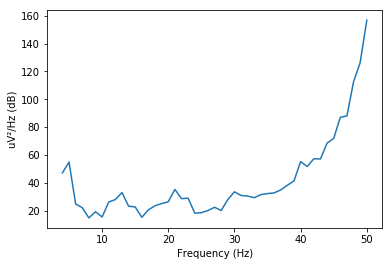

01:11:05.245	intesidade alpha: 29.569686842964796


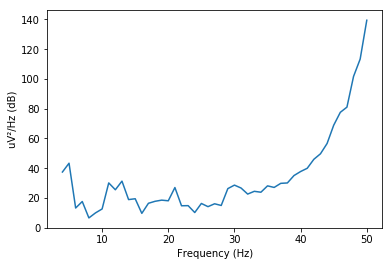

01:11:06.205	intesidade alpha: 32.47912068840988


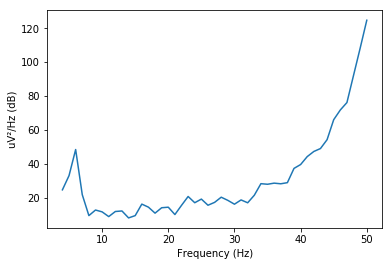

01:11:09.562	intesidade alpha: 20.940659682808384


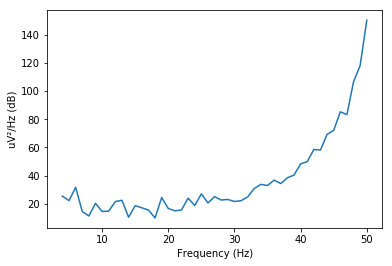

01:11:10.523	intesidade alpha: 51.56050649772916


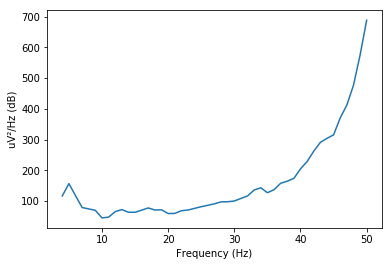

01:11:18.677	intesidade alpha: 203.30004434207916


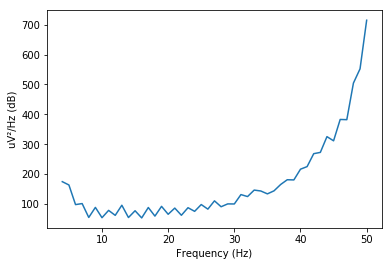

01:11:19.637	intesidade alpha: 182.67476539894474


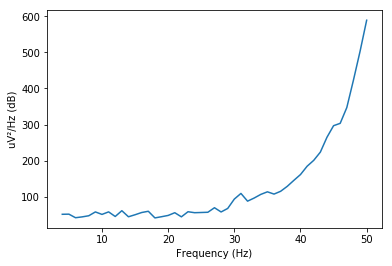

01:11:20.596	intesidade alpha: 241.80769272768362


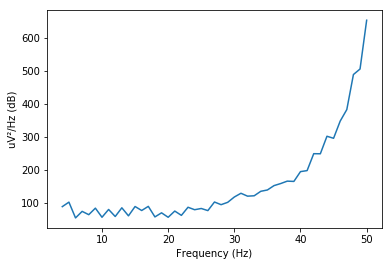

01:11:21.556	intesidade alpha: 255.0


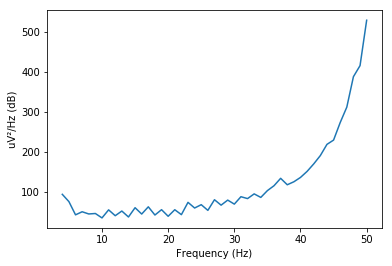

01:11:22.515	intesidade alpha: 188.21287556142536


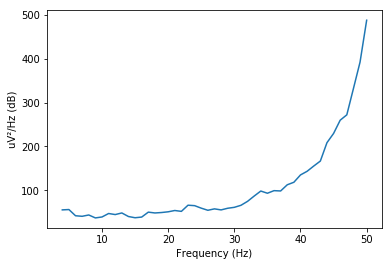

01:11:23.954	intesidade alpha: 184.3599171846648


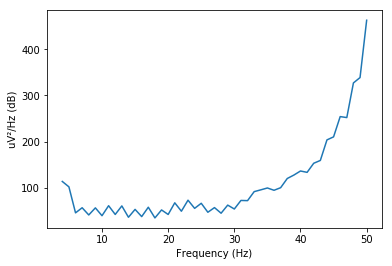

01:11:24.912	intesidade alpha: 124.43288598466445


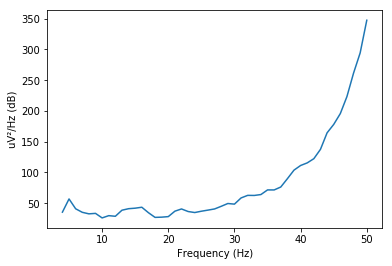

01:11:25.873	intesidade alpha: 139.260330124804


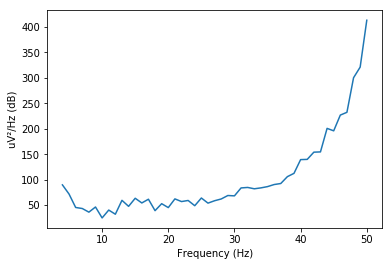

01:11:26.832	intesidade alpha: 144.26829219096012


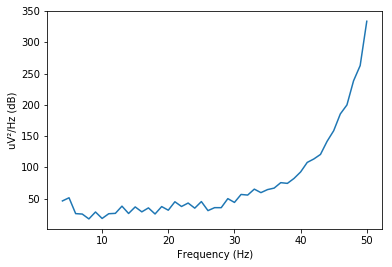

01:11:27.792	intesidade alpha: 128.81749530554828


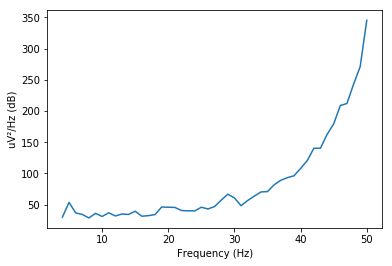

01:11:28.751	intesidade alpha: 141.04484284831852


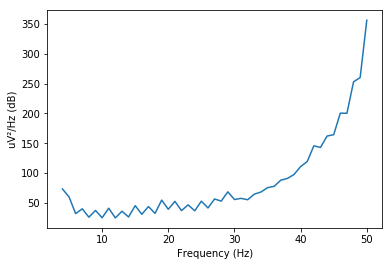

01:11:29.711	intesidade alpha: 125.62299058932784


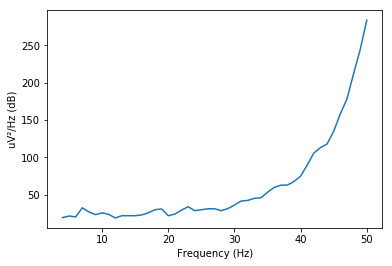

01:11:30.670	intesidade alpha: 117.89574062436238


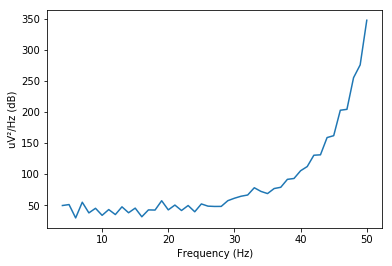

01:11:32.109	intesidade alpha: 133.2880137378304


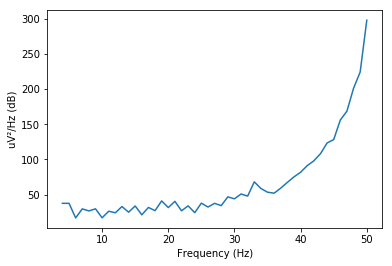

01:11:33.068	intesidade alpha: 111.69113738316494


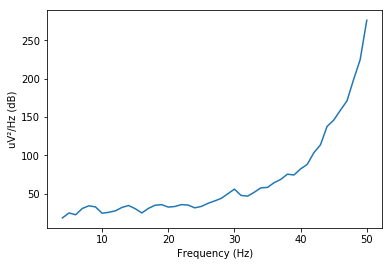

01:11:34.029	intesidade alpha: 111.2674372030572


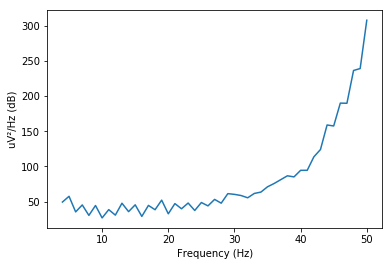

01:11:34.987	intesidade alpha: 115.88174596139584


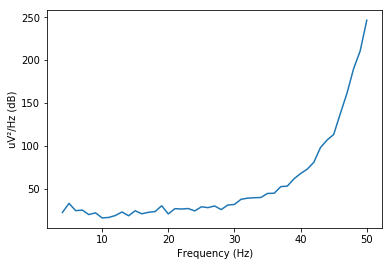

01:11:35.947	intesidade alpha: 98.37343443836009


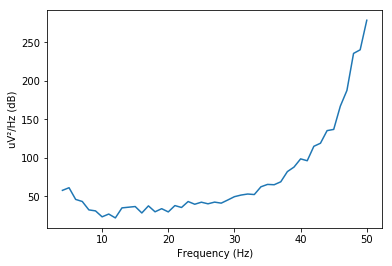

01:11:36.908	intesidade alpha: 92.28209321781108


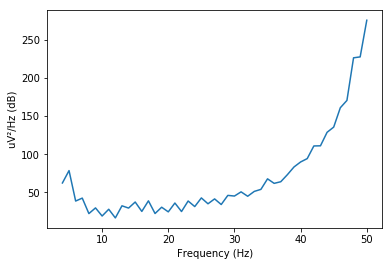

01:11:37.868	intesidade alpha: 76.77019237070763


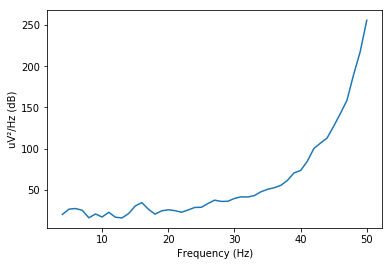

01:11:38.826	intesidade alpha: 107.18553627833171


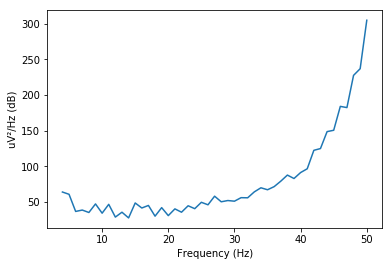

01:11:40.265	intesidade alpha: 106.71209829041857


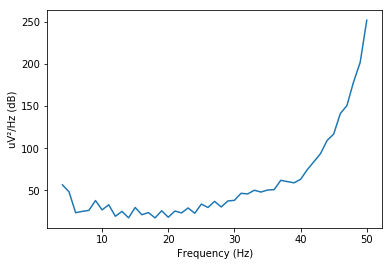

01:11:41.223	intesidade alpha: 81.41097238706628


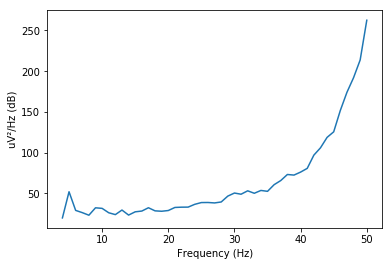

01:11:42.183	intesidade alpha: 106.53165015627715


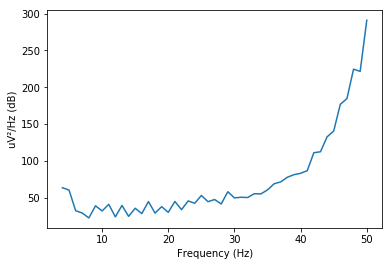

01:11:43.142	intesidade alpha: 100.58379616136001


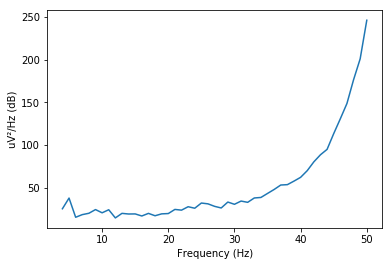

01:11:44.102	intesidade alpha: 96.27797687796071


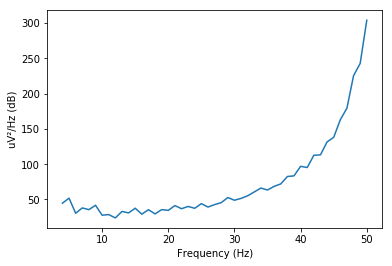

01:11:45.063	intesidade alpha: 113.25611084982572


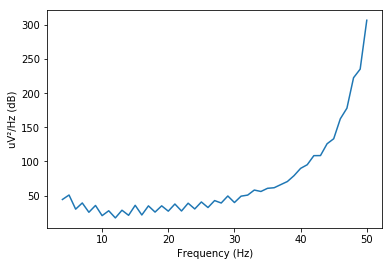

01:11:46.023	intesidade alpha: 105.40702731586646


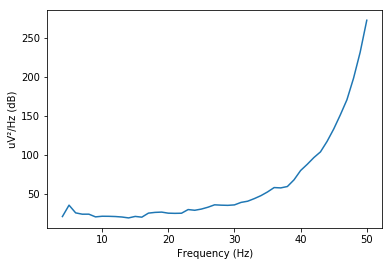

01:11:46.982	intesidade alpha: 113.04452406576117


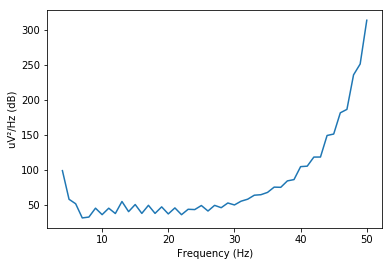

01:11:48.418	intesidade alpha: 90.38978462303973


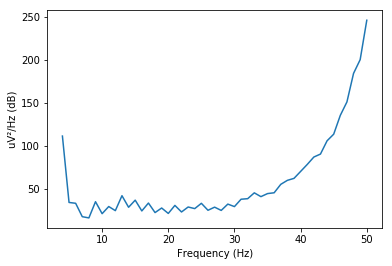

01:11:49.379	intesidade alpha: 56.10231293914974


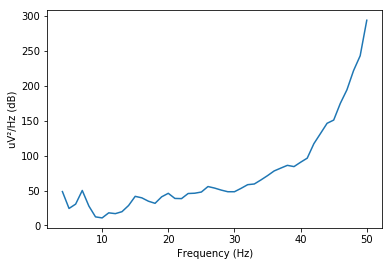

01:11:50.338	intesidade alpha: 122.69454018225775


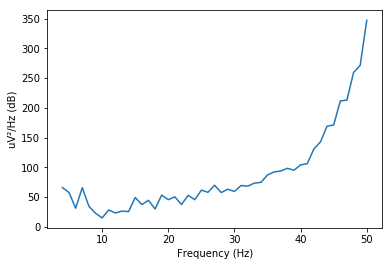

01:11:51.299	intesidade alpha: 128.00443836105234


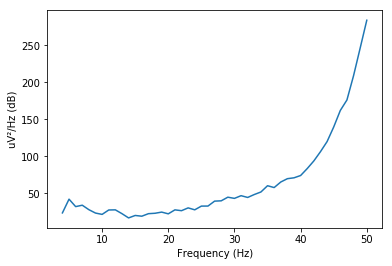

01:11:52.258	intesidade alpha: 111.94309902474447


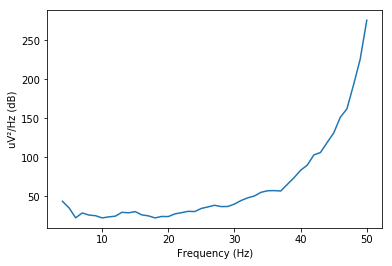

01:11:55.616	intesidade alpha: 107.78415562010969


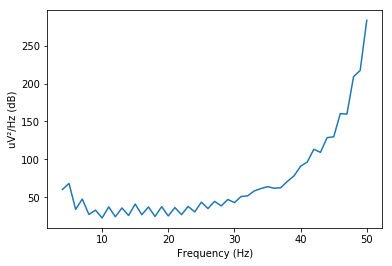

01:11:56.574	intesidade alpha: 80.83246874488665


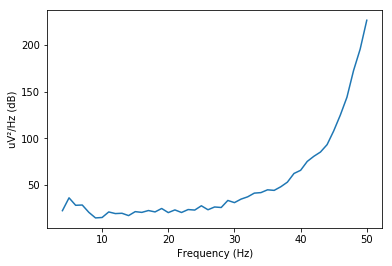

01:11:57.535	intesidade alpha: 84.55930230908801


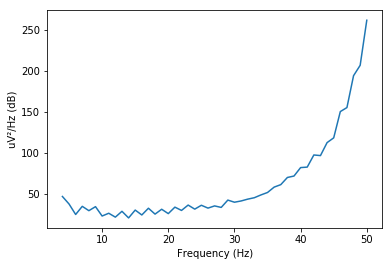

01:11:58.494	intesidade alpha: 94.01334740219


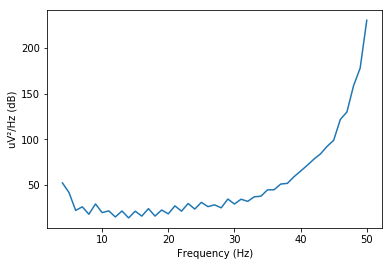

01:11:59.455	intesidade alpha: 67.53256324004762


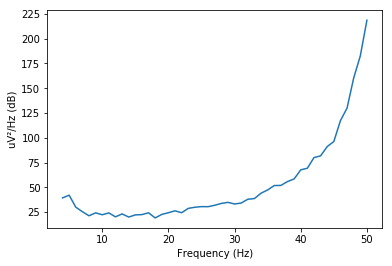

01:12:00.413	intesidade alpha: 72.31635539049351


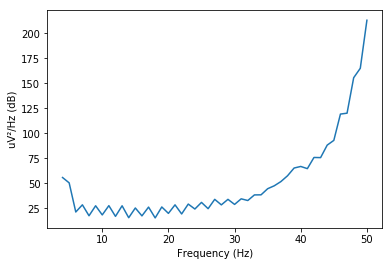

01:12:01.374	intesidade alpha: 57.943319174406554


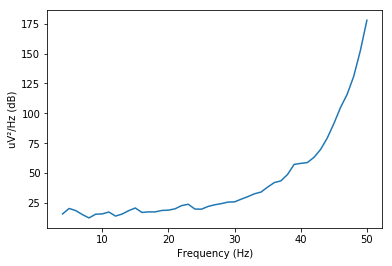

01:12:02.333	intesidade alpha: 75.68157576284185


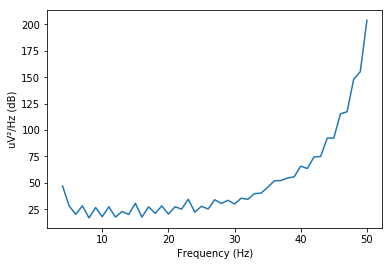

01:12:03.773	intesidade alpha: 70.19238208758007


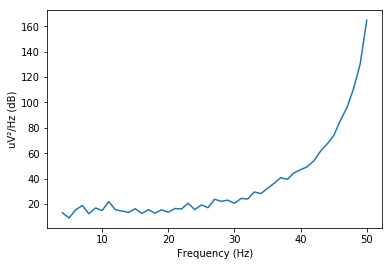

01:12:04.732	intesidade alpha: 65.53058105933475


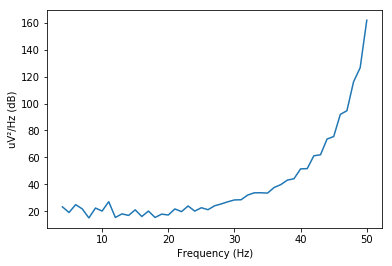

01:12:05.690	intesidade alpha: 61.35595129567925


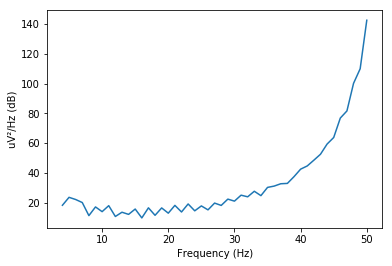

01:12:06.649	intesidade alpha: 46.8702664009934


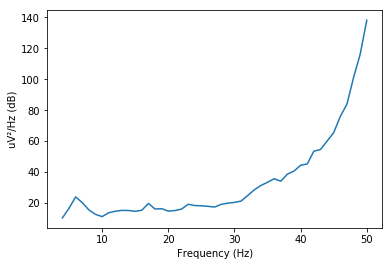

01:12:07.610	intesidade alpha: 55.27802229653766


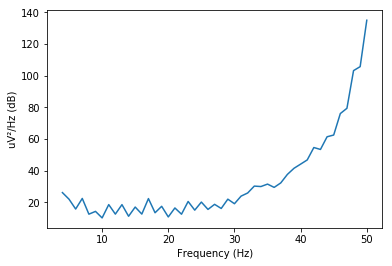

01:12:08.570	intesidade alpha: 46.76300603334289


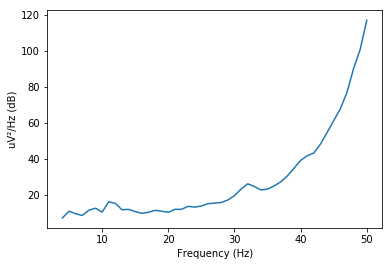

01:12:09.529	intesidade alpha: 52.157127112806094


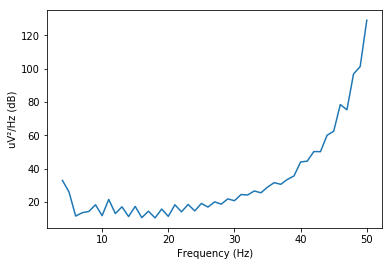

01:12:10.493	intesidade alpha: 44.72576496302792


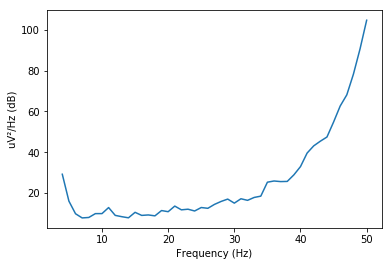

01:12:11.926	intesidade alpha: 39.33416018710315


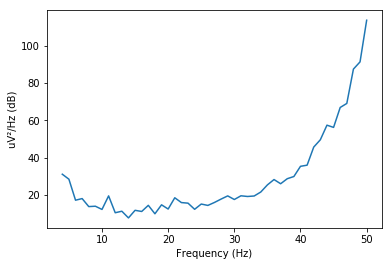

01:12:12.888	intesidade alpha: 29.702392438577732


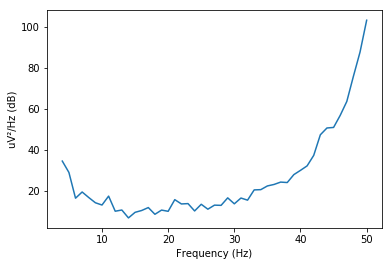

01:12:13.845	intesidade alpha: 19.5122875296786


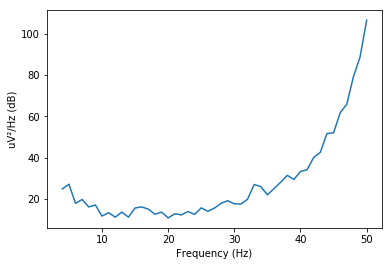

01:12:14.806	intesidade alpha: 28.957364457741523


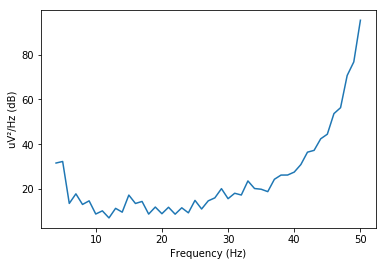

01:12:15.764	intesidade alpha: 17.709540465249006


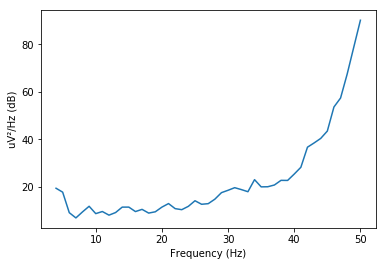

01:12:16.726	intesidade alpha: 35.28762166367026


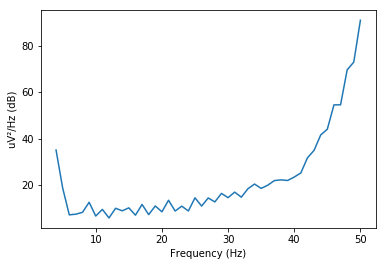

01:12:17.685	intesidade alpha: 25.947558759534655


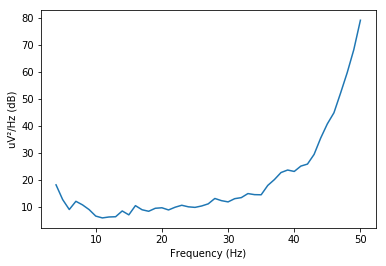

01:12:18.645	intesidade alpha: 26.752721016065017


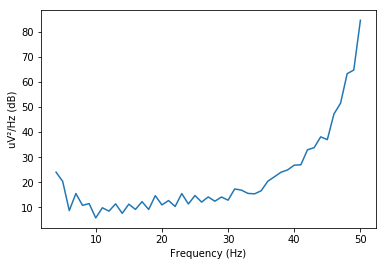

01:12:20.082	intesidade alpha: 22.96977371269326


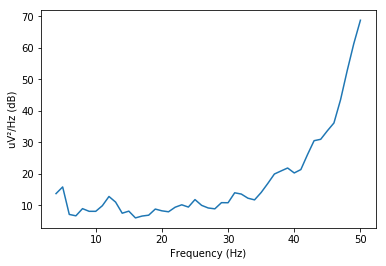

01:12:21.041	intesidade alpha: 25.469535629063166


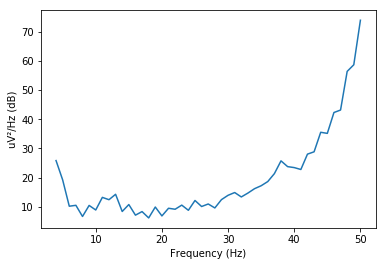

01:12:22.002	intesidade alpha: 18.84441052765706


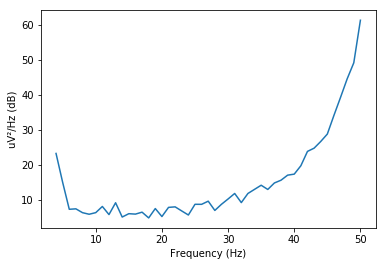

01:12:22.962	intesidade alpha: 14.843645758207195


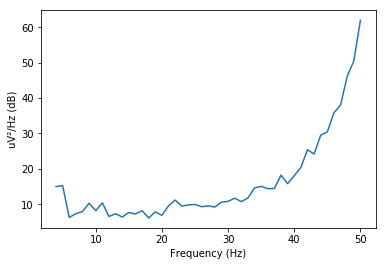

01:12:23.921	intesidade alpha: 20.656994720736417


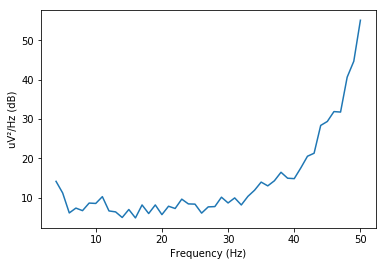

01:12:24.881	intesidade alpha: 18.092198675624196


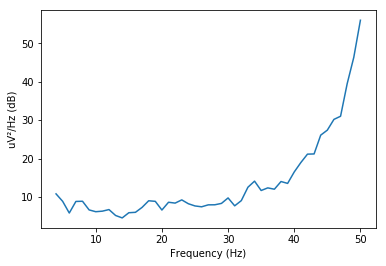

01:12:25.841	intesidade alpha: 19.640061922342092


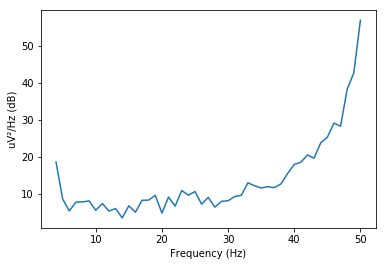

01:12:27.279	intesidade alpha: 16.095636017083148


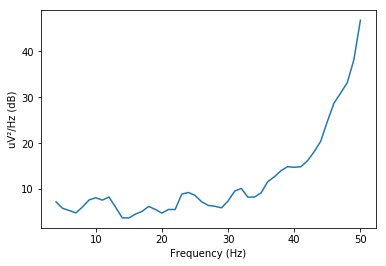

01:12:28.238	intesidade alpha: 17.113417721734773


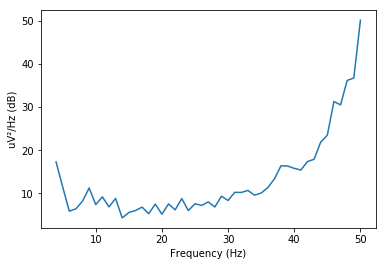

01:12:29.198	intesidade alpha: 13.925960369825752


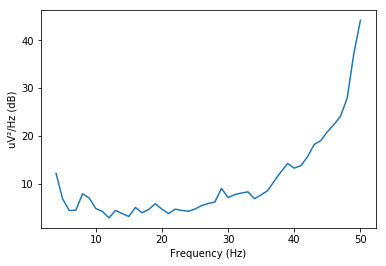

01:12:30.158	intesidade alpha: 14.809824673891727


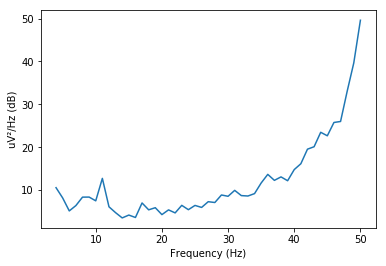

01:12:31.117	intesidade alpha: 15.673483710829183


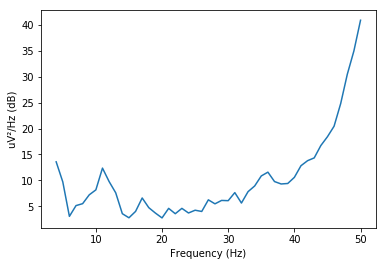

01:12:32.076	intesidade alpha: 9.898032972106945


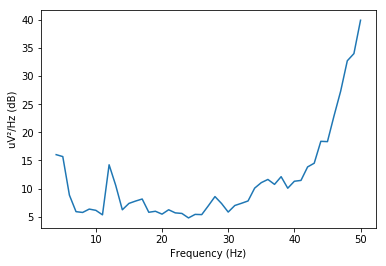

01:12:33.037	intesidade alpha: 5.868938935799888


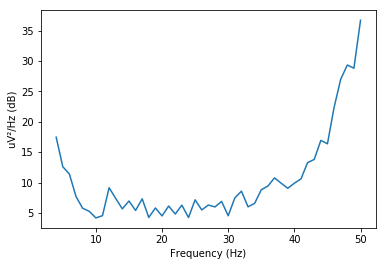

01:12:33.996	intesidade alpha: 2.2534052057390017


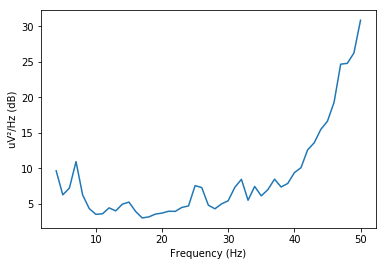

01:12:35.435	intesidade alpha: 6.695191052846855


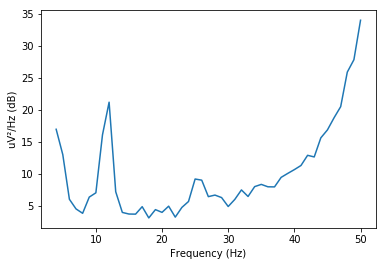

01:12:38.312	intesidade alpha: 3.6053705864508796


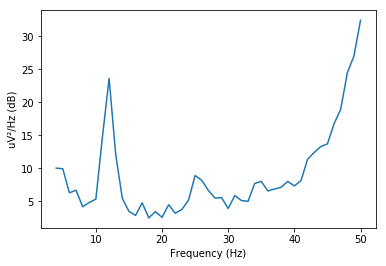

01:12:39.273	intesidade alpha: 1.6790607103598292


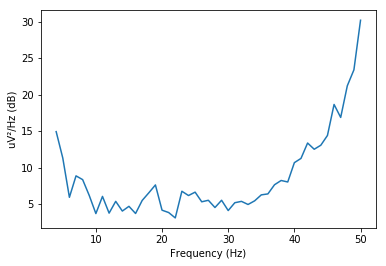

01:12:41.192	intesidade alpha: 1.5235943383130786


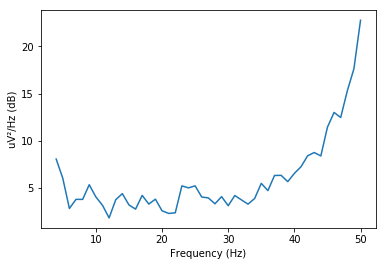

01:12:42.152	intesidade alpha: 5.476830269862


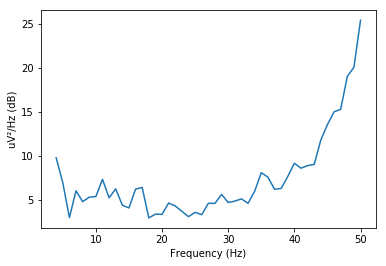

01:12:43.590	intesidade alpha: 5.932435607913238


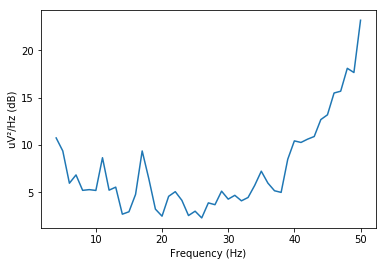

01:12:44.550	intesidade alpha: 2.17396359785646


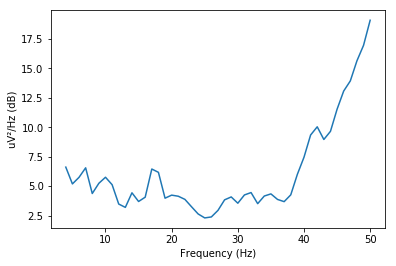

01:12:45.509	intesidade alpha: 3.520016064620544


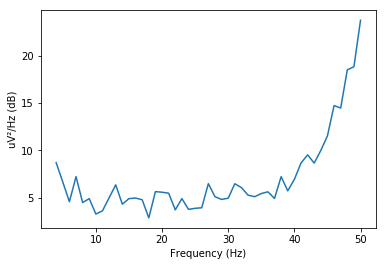

01:12:46.470	intesidade alpha: 4.461631249135156


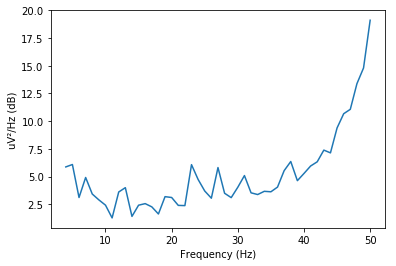

01:12:47.429	intesidade alpha: 4.012971686199785


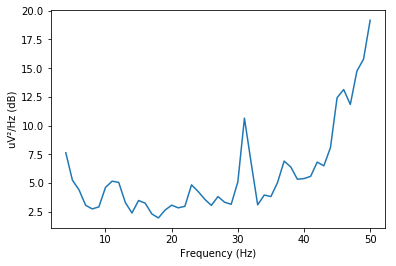

01:12:48.390	intesidade alpha: 5.245486351402798


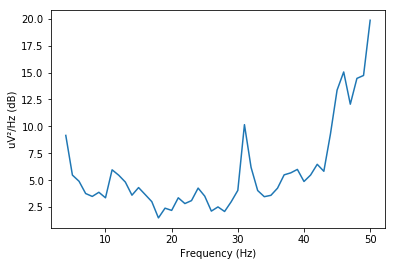

01:12:49.349	intesidade alpha: 3.494931057342569


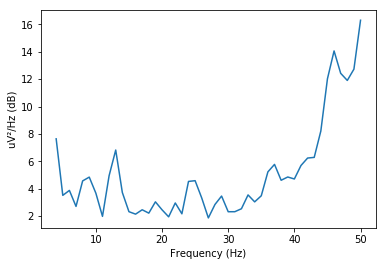

01:12:50.307	intesidade alpha: 4.396201899989183


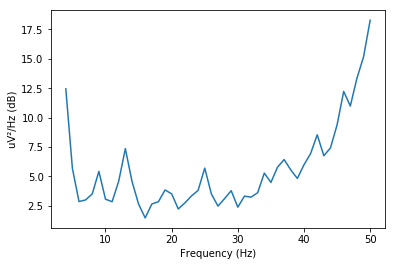

01:12:51.746	intesidade alpha: 2.5486914761458195


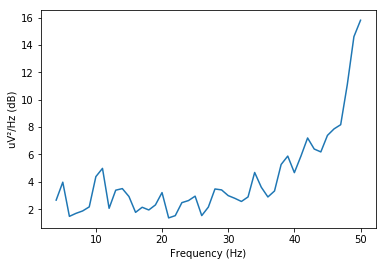

01:12:52.706	intesidade alpha: 5.528926054050728


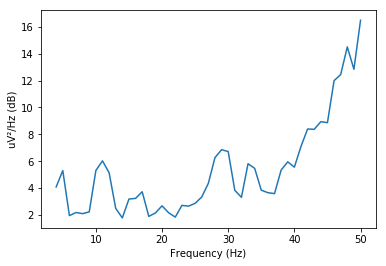

01:12:53.665	intesidade alpha: 6.452146853528186


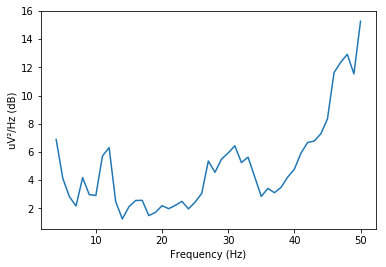

01:12:54.626	intesidade alpha: 4.743692207964271


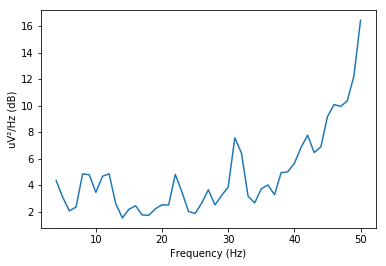

01:12:55.585	intesidade alpha: 3.9511476691221836


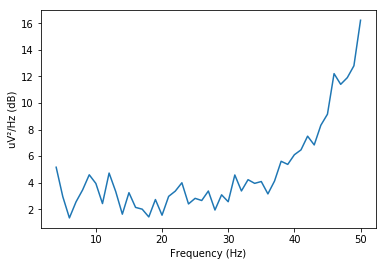

01:12:56.545	intesidade alpha: 5.46016472295715


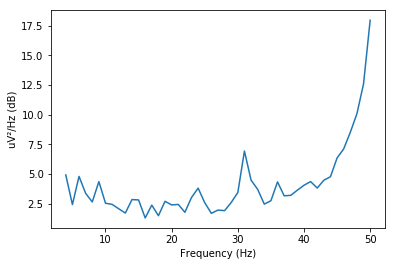

01:12:59.901	intesidade alpha: 3.205349032061001


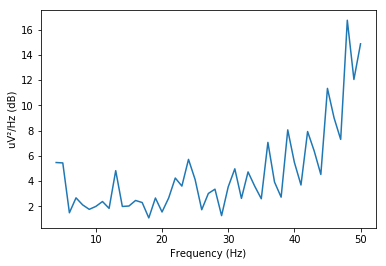

01:13:00.863	intesidade alpha: 5.070122819559197


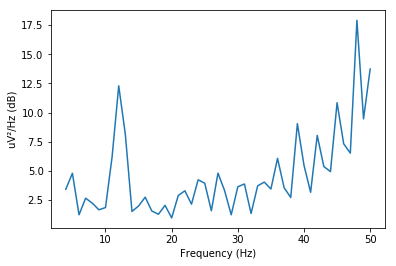

01:13:01.822	intesidade alpha: 2.5688653400961847


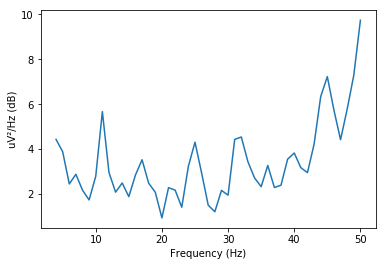

01:13:21.980	intesidade alpha: 2.012216588048317


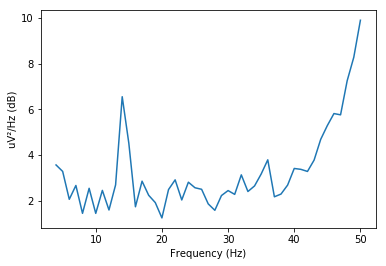

01:13:23.417	intesidade alpha: 2.590057900770846


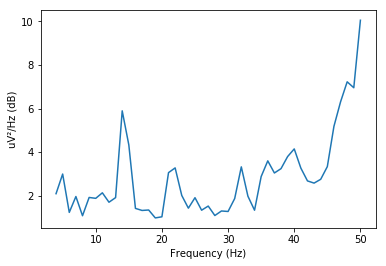

01:13:24.378	intesidade alpha: 3.3481923974764363


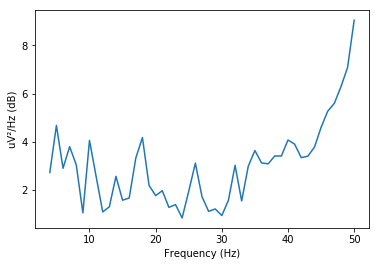

01:13:25.338	intesidade alpha: 1.0


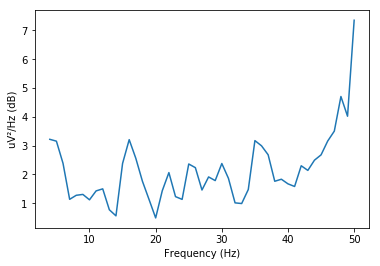

01:14:17.155	intesidade alpha: 1.0460868644127055


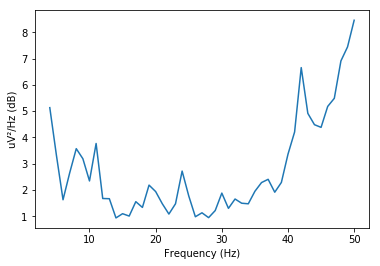

01:14:28.669	intesidade alpha: 1.203151024804355


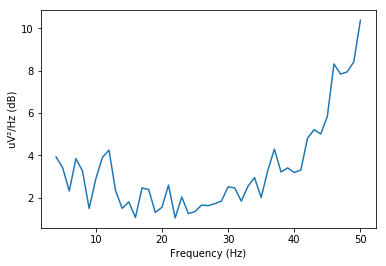

01:14:32.508	intesidade alpha: 2.300211670720169


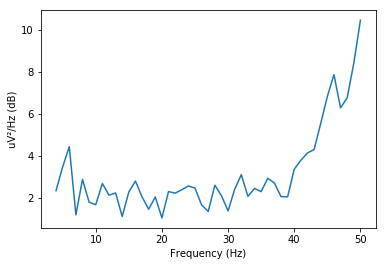

01:14:35.866	intesidade alpha: 2.847808162374738


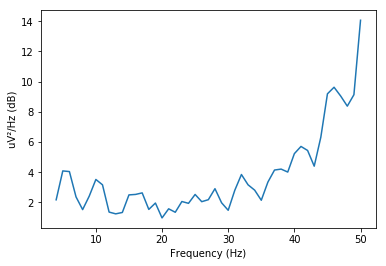

01:14:36.825	intesidade alpha: 4.301125193490828


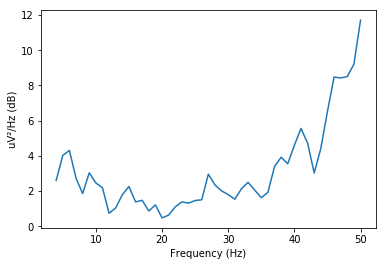

01:14:37.785	intesidade alpha: 2.432143779889119


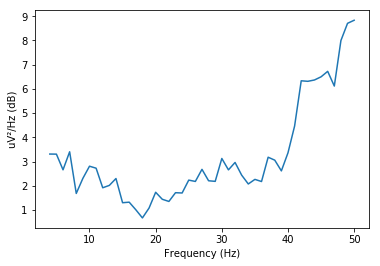

01:14:38.744	intesidade alpha: 2.873794106452805


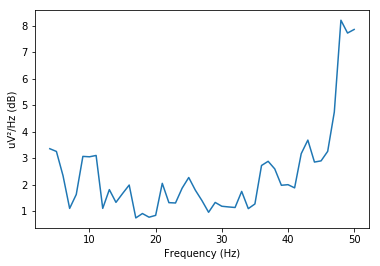

01:17:15.180	intesidade alpha: 1.5511017455968994


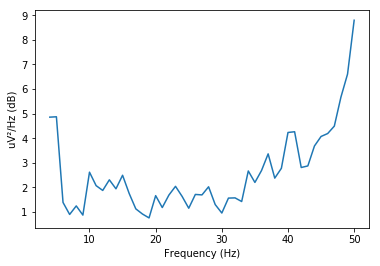

01:17:21.418	intesidade alpha: 1.175675924498238


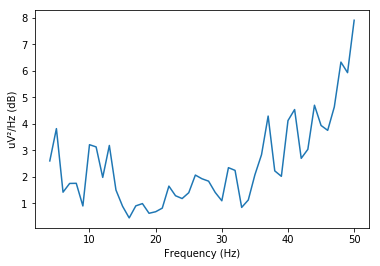

01:17:22.378	intesidade alpha: 2.2887061059471474


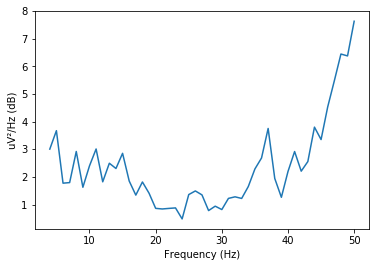

01:17:23.338	intesidade alpha: 1.3059325211537802


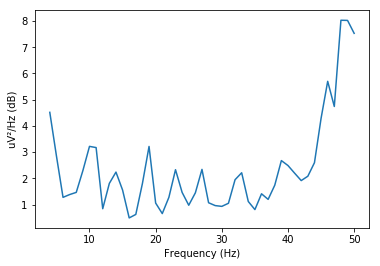

01:17:30.535	intesidade alpha: 1.3972848034264782


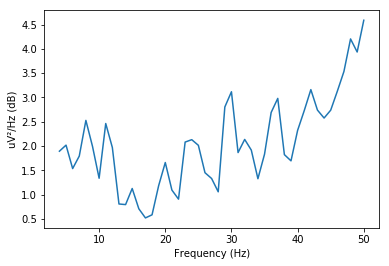

01:17:37.733	intesidade alpha: 1.8133534709654806


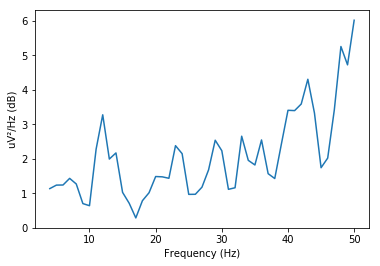

01:17:38.693	intesidade alpha: 2.704018104351488


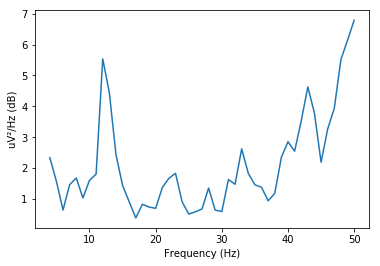

01:17:39.654	intesidade alpha: 1.2248703524958668


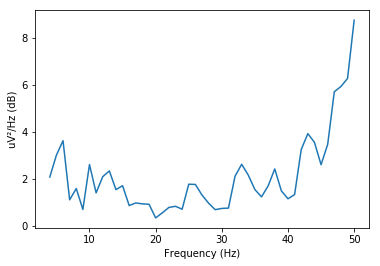

01:17:42.533	intesidade alpha: 1.3380425208792364


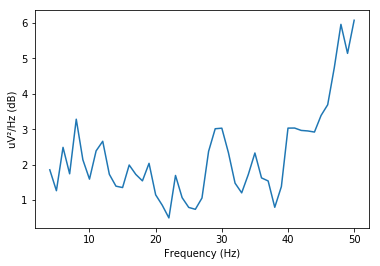

01:17:46.849	intesidade alpha: 1.4239976520065518


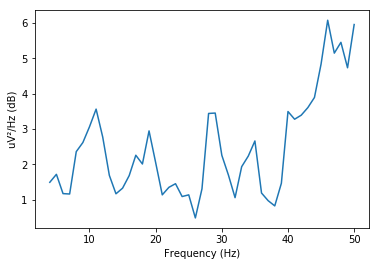

01:17:47.810	intesidade alpha: 1.046194044397429


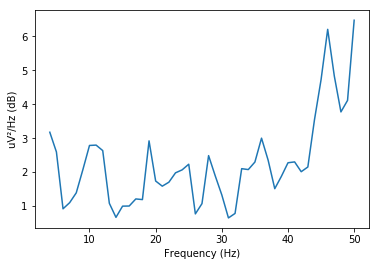

01:17:48.772	intesidade alpha: 1.5271883680478708


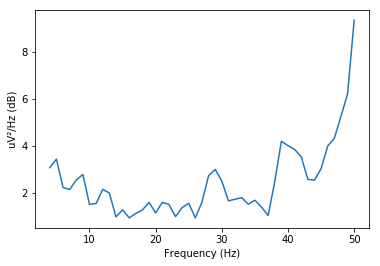

01:17:55.968	intesidade alpha: 1.5029867807561452


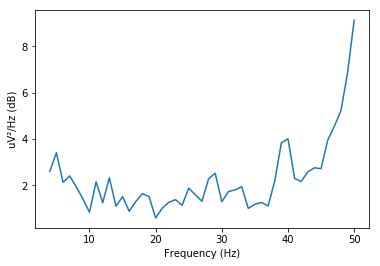

01:17:56.928	intesidade alpha: 1.2870393410648662


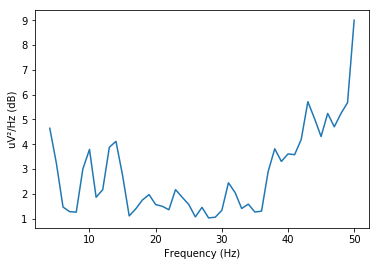

01:18:01.245	intesidade alpha: 2.002306247947769


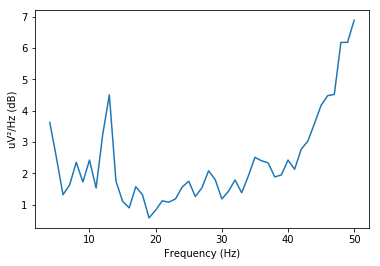

01:18:04.125	intesidade alpha: 1.9777400215876848


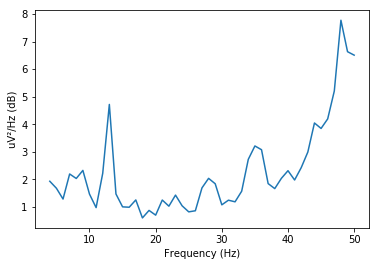

01:18:05.085	intesidade alpha: 2.914477939168254


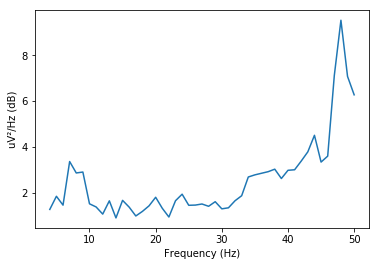

01:18:06.046	intesidade alpha: 3.307470877850957


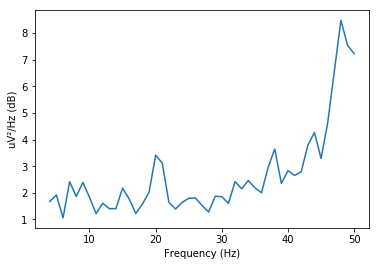

01:18:07.004	intesidade alpha: 3.669435254611634


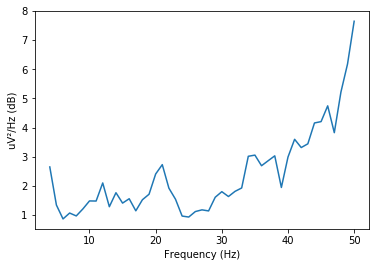

01:18:08.443	intesidade alpha: 3.634823060342808


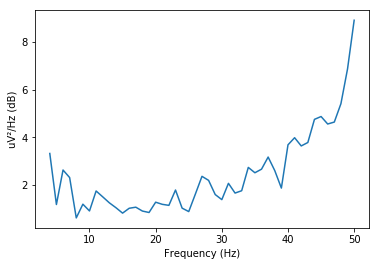

01:18:09.402	intesidade alpha: 2.6963875040422387


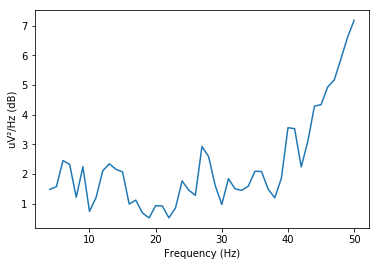

01:18:10.362	intesidade alpha: 2.7678688439968573


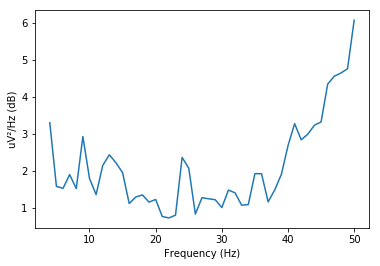

01:18:11.322	intesidade alpha: 1.6473119381443273


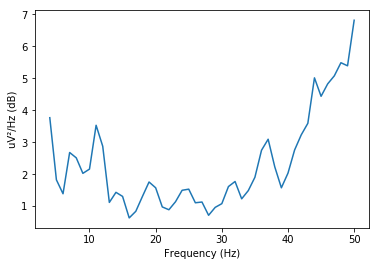

01:18:12.283	intesidade alpha: 1.2898154021753678


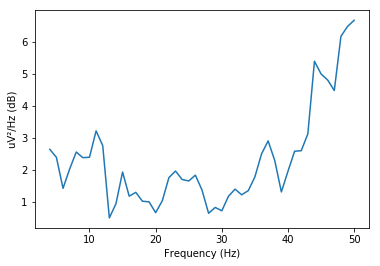

01:18:13.241	intesidade alpha: 1.1722351180926083


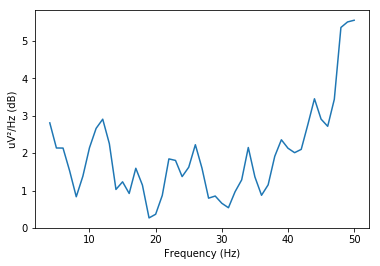

01:18:14.203	intesidade alpha: 1.1260457277195421


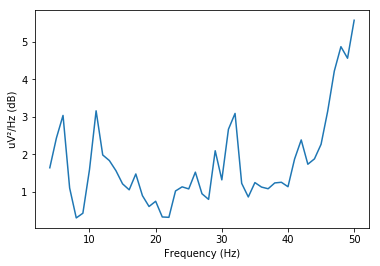

01:18:28.598	intesidade alpha: 1.0885272919764437


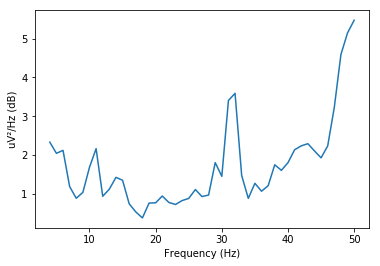

01:18:29.558	intesidade alpha: 1.4240789125250788


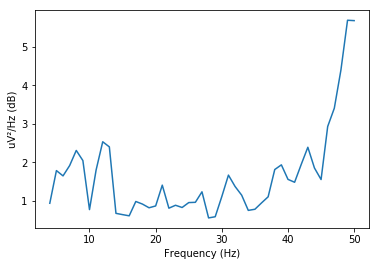

01:18:30.517	intesidade alpha: 1.0029294269956424


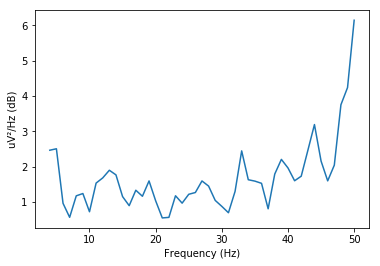

01:18:45.872	intesidade alpha: 1.6643994355732565


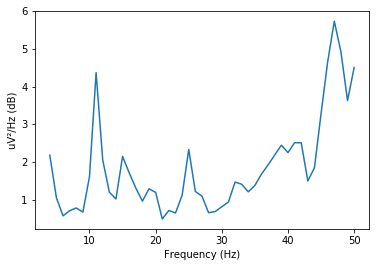

01:18:49.231	intesidade alpha: 1.6218780972269342


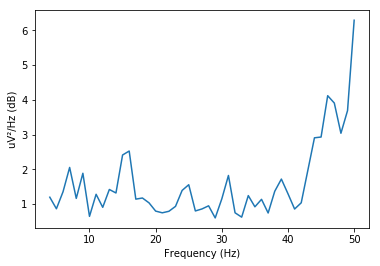

01:18:56.428	intesidade alpha: 1.8517405494108887


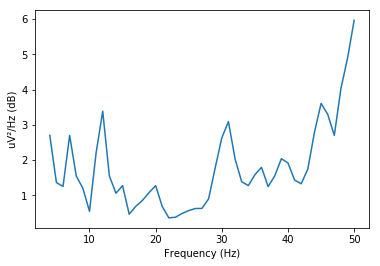

01:19:09.385	intesidade alpha: 1.2925567118894694


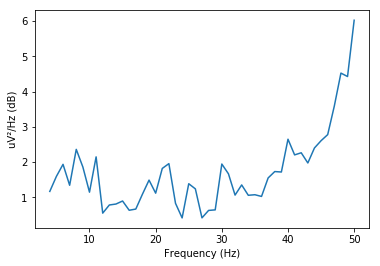

01:19:11.782	intesidade alpha: 1.799257707042067


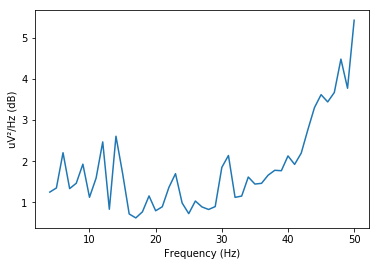

01:19:12.743	intesidade alpha: 1.8340816622583396


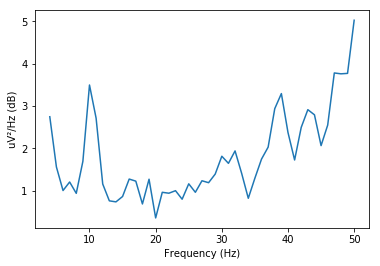

01:19:28.102	intesidade alpha: 1.3896485254375972


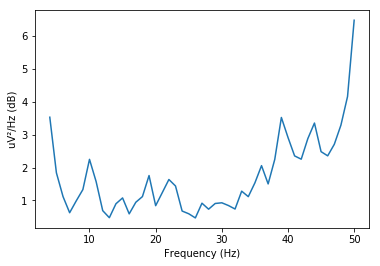

01:19:29.062	intesidade alpha: 1.5471504671190661


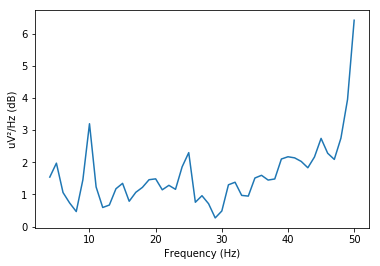

01:19:30.021	intesidade alpha: 1.8452631854406554


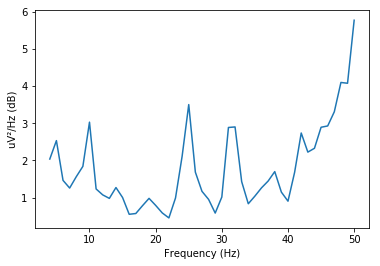

01:19:30.982	intesidade alpha: 1.5980193221678038


In [178]:
valores = np.array(valores)
valores = np.interp(valores, (valores.min(), valores.max()), (1, 255))
for i in range(len(valores)):

    
	#raws[i].plot_psd(area_mode='range')
	#print(raws[i].get_data().shape)
	#plt.plot(np.linspace(0, 1, 750), raws[i].get_data()[0])
    
	plt.plot(psdss[i][1], psdss[i][0])
	plt.xlabel('Frequency (Hz)')
	plt.ylabel('uV²/Hz (dB)')
	plt.show()
	print(str(tempos[i][0]) + '\tintesidade alpha: ' + str(valores[i]))

